Accuracy within 10%: 0.32415
Accuracy within 15%: 0.49213
Accuracy within 20%: 0.61549


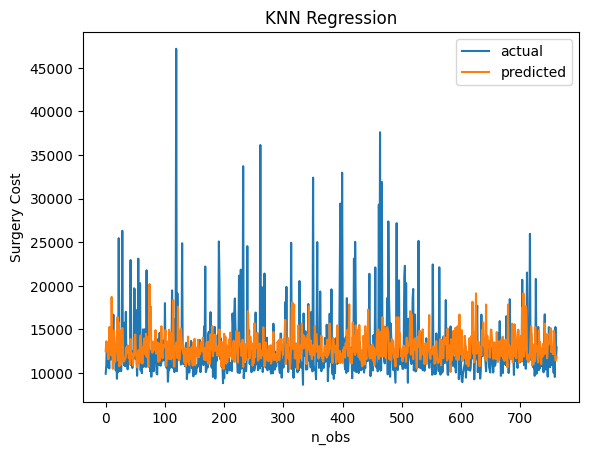

In [21]:
# STAT 574 Midterm Exam Problem 4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

hospital_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/hospital_data.csv")
gender_code = {'M':1, 'F':0}
hospital_data["gender"] = hospital_data["gender"].map(gender_code)

X = hospital_data.iloc[:, 0:6].values
y = hospital_data.iloc[:, 6].values

# Splitting the data into 80% training and 20% testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
random_state=796880)

# Fitting KNN Regression

knn_reg = KNeighborsRegressor(n_neighbors=6)
knn_regfit = knn_reg.fit(X_train, y_train)

# Computing prediction accuracy for testing data. 

y_pred = knn_regfit.predict(X_test)
ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)

# Accuracy within 10%
accuracy10 = mean(ind10)
print("Accuracy within 10%:", round(accuracy10, 5))

# Accuracy within 15%
accuracy15 = mean(ind15)
print("Accuracy within 15%:", round(accuracy15, 5))

# Accuracy within 20%
accuracy20 = mean(ind20)
print("Accuracy within 20%:", round(accuracy20, 5))

# Plotting actual and predicted observations vs observation number. 

n_obs = list(range(0, len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel("n_obs")
plt.ylabel("Surgery Cost")
plt.title("KNN Regression")
plt.legend()
plt.show()


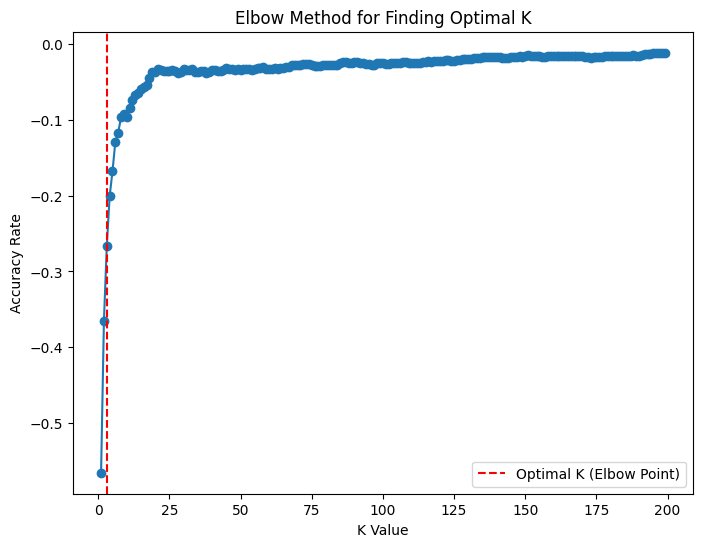

In [10]:
# Bonus: We use the Elbow Method here (taught in STAT 576 with Dr.
# Seungjoon Lee) to find the optimal number of neighbors for KNN.
# The idea here is that we plot accuracy rates vs. number of
# neighbors. 

k_values = range(1, 200)
acc_rates = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_rate = r2_score(y_test, y_pred)
    acc_rates.append(acc_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, acc_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

# Optimal number of neighbors is about 6, marked by the line of 
# diminishing returns.